In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("India_Agriculture.csv")

In [ ]:
df.describe()

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
categorical_col=df.select_dtypes(include=['object']).columns

In [ ]:
for i in categorical_col:
  df[i] = df[i].str.strip()

In [ ]:
df.isnull().sum()

,0
State,0
District,0
Crop,9
Crop_Year,0
Season,0
Area,0
Production,4948
Yield,0


In [ ]:
df.dropna(subset=["Crop"],inplace=True)

In [ ]:
4948/df.shape[0]*100

1.4328448108604308

In [ ]:
df[df['Production'].isnull()]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
11,Andaman and Nicobar Island,NICOBARS,Arecanut,2005,Whole Year,795.67,NaN,0.0
270,Andaman and Nicobar Island,SOUTH ANDAMANS,Cowpea(Lobia),2016,Rabi,2.00,NaN,0.0
278,Andaman and Nicobar Island,NICOBARS,Dry chillies,2005,Whole Year,17.00,NaN,0.0
770,Andhra Pradesh,VIZIANAGARAM,Arecanut,2011,Whole Year,1.00,NaN,0.0
833,Andhra Pradesh,ANANTAPUR,Arhar/Tur,2016,Rabi,1.00,NaN,0.0
...,...,...,...,...,...,...,...,...
338997,West Bengal,PURBA BARDHAMAN,Moong(Green Gram),2005,Summer,1.00,NaN,0.0
339699,West Bengal,MEDINIPUR WEST,Peas & beans (Pulses),2010,Rabi,2.00,NaN,0.0
340760,West Bengal,PURULIA,Rapeseed &Mustard,2001,Rabi,427.00,NaN,0.0
340761,West Bengal,PURULIA,Rapeseed &Mustard,2002,Rabi,522.00,NaN,0.0


In [ ]:
disaster_affected=df[df['Production'].isnull()]

In [ ]:
df['Production'].fillna(0,inplace=True)

/tmp/ipython-input-3582990764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(0,inplace=True)


In [ ]:
df.isnull().sum()

,0
State,0
District,0
Crop,0
Crop_Year,0
Season,0
Area,0
Production,0
Yield,0


In [ ]:
for i in categorical_col:
  print(df[i].value_counts())

State
Uttar Pradesh                 44781
Madhya Pradesh                29906
Karnataka                     27493
Bihar                         24697
Rajasthan                     20363
Tamil Nadu                    18498
Assam                         18186
Maharashtra                   17922
Andhra Pradesh                16363
Odisha                        16153
Chhattisgarh                  15285
Gujarat                       14053
West Bengal                   12596
Haryana                        8305
Uttarakhand                    6702
Nagaland                       5676
Himachal Pradesh               5043
Jharkhand                      5004
Kerala                         4870
Telangana                      4684
Arunachal Pradesh              4345
Meghalaya                      4322
Jammu and Kashmir              4175
Punjab                         4142
Manipur                        3093
Tripura                        2557
Mizoram                        2102
Puducherry            

In [ ]:
df['State'] = df['State'].replace('THE DADRA AND NAGAR HAVELI', 'Dadra and Nagar Haveli')

df['Crop'] = df['Crop'].replace('Rapeseed &Mustard', 'Rapeseed & Mustard')

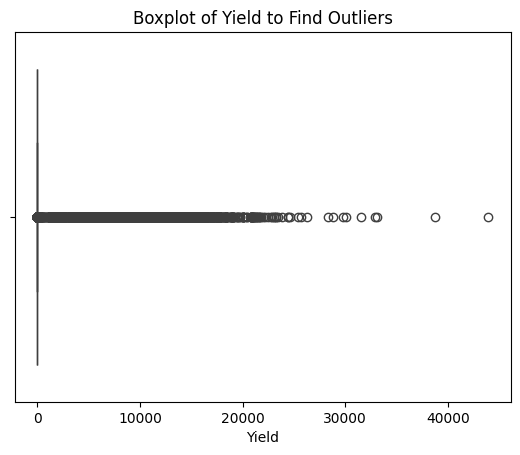

In [ ]:
sns.boxplot(x=df['Yield'])
plt.title('Boxplot of Yield to Find Outliers')
plt.show()

In [ ]:
df.sort_values(by='Yield', ascending=False).head(30)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
24551,Assam,TINSUKIA,Coconut,2018,Whole Year,72.0,3165000.0,43958.33
333525,West Bengal,BIRBHUM,Coconut,2006,Whole Year,509.0,19749200.0,38800.00
258896,Tamil Nadu,ERODE,Coconut,2008,Whole Year,10014.0,331800000.0,33133.61
24552,Assam,TINSUKIA,Coconut,2019,Whole Year,71.0,2340000.0,32957.75
3122,Andhra Pradesh,PRAKASAM,Coconut,2018,Whole Year,19.0,600000.0,31578.95
24548,Assam,TINSUKIA,Coconut,2015,Whole Year,75.0,2257000.0,30093.33
3229,Andhra Pradesh,WEST GODAVARI,Coconut,2019,Whole Year,23316.0,694164000.0,29772.00
24549,Assam,TINSUKIA,Coconut,2016,Whole Year,76.0,2188000.0,28789.47
24303,Assam,KAMRUP,Coconut,2005,Whole Year,2026.0,57405000.0,28334.16
24402,Assam,LAKHIMPUR,Coconut,2001,Whole Year,192.0,5044000.0,26270.83


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Coconut'),
  Text(1, 0, 'Sugarcane'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Wheat'),
  Text(4, 0, 'Potato'),
  Text(5, 0, 'Cotton(lint)'),
  Text(6, 0, 'Maize'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Banana'),
  Text(9, 0, 'Soyabean')])

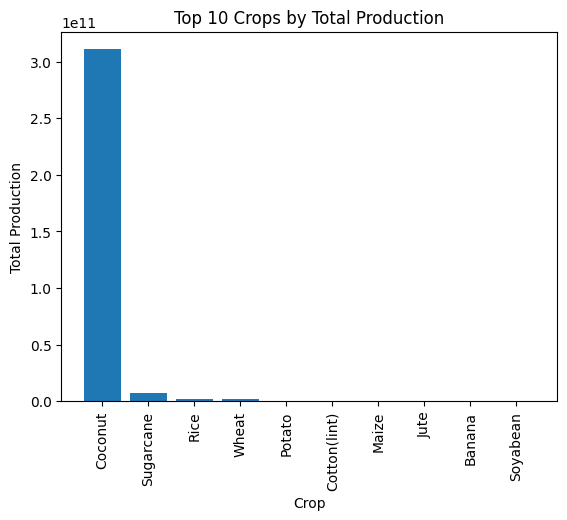

In [ ]:
total_production_by_crop=df.groupby("Crop")["Production"].sum().reset_index()
top10_Crops_by_production=total_production_by_crop.sort_values(by="Production",ascending=False).head(10)
plt.bar(top10_Crops_by_production["Crop"],top10_Crops_by_production["Production"])
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Crop")
plt.ylabel("Total Production")
plt.xticks(rotation=90)

In [ ]:
conversion_factors = {
    # --- Group 1: Quintals to Tonnes (0.1) ---
    'Banana': 0.1,
    'Onion': 0.1,
    'Potato': 0.1,
    'Sugarcane':0.1,
    'Sweet potato': 0.1,
    'Tapioca': 0.1,
    'Wheat':0.1,
    'Soyabean':0.1,
    'Rice': 0.1,

    # --- Group 2: Bales to Tonnes (0.170 or 0.180) ---
    'Cotton(lint)': 0.170,
    'Jute': 0.180,
    'Mesta': 0.180,
    'Sannhamp': 0.180,

    # --- Group 3: Kilograms to Tonnes (0.001) ---
    # ONLY spices and low-yield crops
    'Arecanut': 0.001,
    'Black pepper': 0.001,
    'Cardamom': 0.001,
    'Coriander': 0.001,
    'Dry chillies': 0.001,
    'Garlic': 0.001,
    'Ginger': 0.001,
    'Tobacco': 0.001,
    'Turmeric': 0.001,
    'Sesamum': 0.001,
    'Castor seed': 0.001,
    'Linseed': 0.001,
    'Niger seed': 0.001,
    'Safflower': 0.001,
    'Sunflower': 0.001,
    'Maize': 0.001,
    'Bajra': 0.001,
    'Arhar/Tur': 0.001,
    'Groundnut': 0.001,
    'Other  Rabi pulses': 0.001,


    # --- Group 4: Nuts to Tonnes (0.0014) ---
    'Coconut': 0.001,
}
def standardize_production(row):
    crop_name = row['Crop'].strip()  # clean up spaces if any
    factor = conversion_factors.get(crop_name, 1.0)
    return row['Production'] * factor

df['Production_Tonnes'] = df.apply(standardize_production, axis=1)

In [ ]:
df['Yield_Tonnes_Per_Hectare'] = np.where(
    df['Area'] == 0,
    0,
    df['Production_Tonnes'] / df['Area']
)

df['Yield_Tonnes_Per_Hectare'].describe()

,Yield_Tonnes_Per_Hectare
count,345327.000000
mean,0.755177
std,16.781144
min,0.000000
25%,0.001290
50%,0.231132
75%,0.796601
max,9801.000000


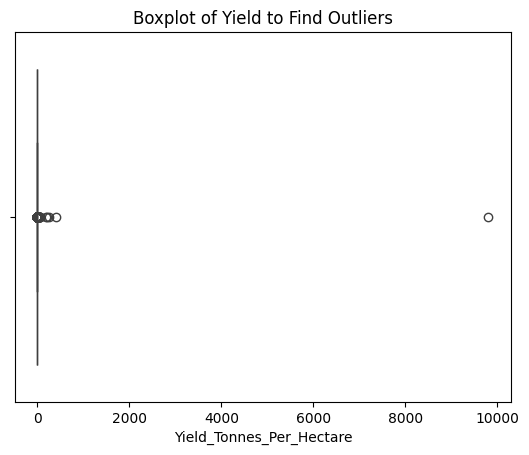

In [ ]:
sns.boxplot(x=df['Yield_Tonnes_Per_Hectare'])
plt.title('Boxplot of Yield to Find Outliers')
plt.show()

In [ ]:
df.sort_values(by='Yield_Tonnes_Per_Hectare', ascending=False).head(30)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Production_Tonnes,Yield_Tonnes_Per_Hectare
258028,Tamil Nadu,PERAMBALUR,Cashewnut,2008,Whole Year,1.0,9801.0,9801.00,9801.00,9801.000000
10387,Andhra Pradesh,SRIKAKULAM,Onion,2017,Kharif,2.0,8140.0,4070.00,814.00,407.000000
10389,Andhra Pradesh,SRIKAKULAM,Onion,2018,Kharif,3.0,7832.0,2610.67,783.20,261.066667
99010,Haryana,KARNAL,Onion,2008,Whole Year,2.0,4300.0,2150.00,430.00,215.000000
249767,Rajasthan,CHITTORGARH,Sannhamp,2017,Kharif,1.0,1022.0,1022.00,183.96,183.960000
181586,Maharashtra,PUNE,Cotton(lint),1997,Whole Year,2.0,600.0,300.00,102.00,51.000000
60573,Bihar,BUXAR,Sugarcane,1997,Whole Year,59.0,29529.0,500.49,2952.90,50.049153
24551,Assam,TINSUKIA,Coconut,2018,Whole Year,72.0,3165000.0,43958.33,3165.00,43.958333
181622,Maharashtra,SATARA,Cotton(lint),1997,Whole Year,45.0,10600.0,235.56,1802.00,40.044444
85873,Gujarat,NAVSARI,Guar seed,2012,Whole Year,100.0,4000.0,40.00,4000.00,40.000000


In [ ]:
df_filtered = df[df['Area'] > 20.0].copy()

In [ ]:
df_filtered.sort_values(by='Yield_Tonnes_Per_Hectare', ascending=False).head(30)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Production_Tonnes,Yield_Tonnes_Per_Hectare
60573,Bihar,BUXAR,Sugarcane,1997,Whole Year,59.0,29529.0,500.49,2952.90,50.049153
24551,Assam,TINSUKIA,Coconut,2018,Whole Year,72.0,3165000.0,43958.33,3165.00,43.958333
181622,Maharashtra,SATARA,Cotton(lint),1997,Whole Year,45.0,10600.0,235.56,1802.00,40.044444
85873,Gujarat,NAVSARI,Guar seed,2012,Whole Year,100.0,4000.0,40.00,4000.00,40.000000
181599,Maharashtra,SANGLI,Cotton(lint),1997,Whole Year,32.0,7500.0,234.38,1275.00,39.843750
333525,West Bengal,BIRBHUM,Coconut,2006,Whole Year,509.0,19749200.0,38800.00,19749.20,38.800000
241024,Rajasthan,BUNDI,Guar seed,1999,Whole Year,87.0,2924.0,33.61,2924.00,33.609195
258896,Tamil Nadu,ERODE,Coconut,2008,Whole Year,10014.0,331800000.0,33133.61,331800.00,33.133613
24552,Assam,TINSUKIA,Coconut,2019,Whole Year,71.0,2340000.0,32957.75,2340.00,32.957746
10838,Andhra Pradesh,EAST GODAVARI,other oilseeds,2013,Kharif,8648.0,281707.0,32.57,281707.00,32.574815


In [ ]:
df_filtered[
    (df_filtered['Crop_Year'] == 2015) &
    (df_filtered['Crop'] == 'Soyabean')
]['Production_Tonnes'].sum()

np.float64(761160.1)

In [ ]:
df_filtered['Yield_Tonnes_Per_Hectare'].describe()

,Yield_Tonnes_Per_Hectare
count,297040.000000
mean,0.751184
std,1.644490
min,0.000000
25%,0.001448
50%,0.251853
75%,0.810028
max,50.049153


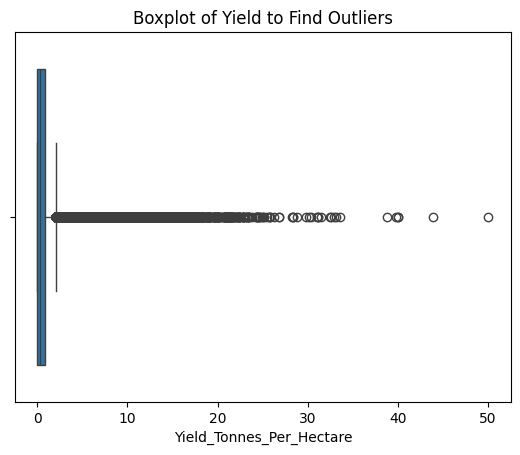

In [ ]:
sns.boxplot(x=df_filtered['Yield_Tonnes_Per_Hectare'])
plt.title('Boxplot of Yield to Find Outliers')
plt.show()

In [ ]:
Q1 = df_filtered['Yield_Tonnes_Per_Hectare'].quantile(0.25)
Q3 = df_filtered['Yield_Tonnes_Per_Hectare'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

np.float64(2.0228994085796566)

In [ ]:
len(df_filtered[df_filtered['Yield_Tonnes_Per_Hectare'] > upper_bound])

23289

In [ ]:
df_filtered['Yield_log'] = np.log1p(df_filtered['Yield_Tonnes_Per_Hectare'])

In [ ]:
df_filtered['Yield_log'].describe()

,Yield_log
count,297040.000000
mean,0.384869
std,0.496108
min,0.000000
25%,0.001447
50%,0.224625
75%,0.593343
max,3.932789


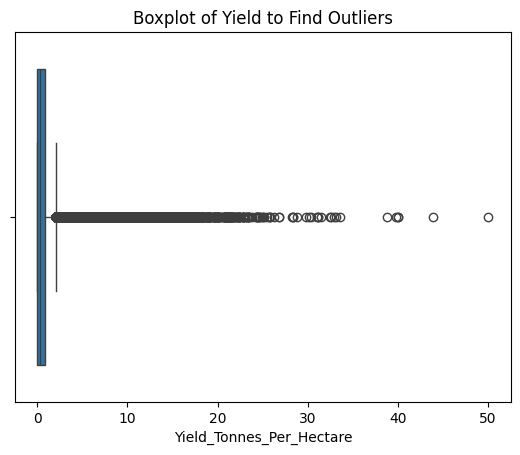

In [ ]:
sns.boxplot(x=df_filtered['Yield_Tonnes_Per_Hectare'])
plt.title('Boxplot of Yield to Find Outliers')
plt.show()

In [816]:
df_filtered.isnull().sum()

,0
State,0
District,0
Crop,0
Crop_Year,0
Season,0
Area,0
Production,0
Yield,0
Production_Tonnes,0
Yield_Tonnes_Per_Hectare,0


In [ ]:
df_filtered.shape

(297040, 11)

In [ ]:
df_filtered.describe()

,Crop_Year,Area,Production,Yield,Production_Tonnes,Yield_Tonnes_Per_Hectare,Yield_log
count,297040.000000,2.970400e+05,2.970400e+05,297040.000000,2.970400e+05,297040.000000,297040.000000
mean,2008.768984,1.356787e+04,1.098318e+06,89.311986,8.323182e+03,0.751184,0.384869
std,6.563858,4.916633e+04,2.304489e+07,972.557004,4.944478e+04,1.644490,0.496108
min,1997.000000,2.012000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2003.000000,1.780000e+02,1.950000e+02,0.570000,1.921750e+00,0.001448,0.001447
50%,2009.000000,9.170000e+02,1.215000e+03,1.040000,1.040000e+02,0.251853,0.224625
75%,2015.000000,5.895000e+03,1.040000e+04,2.490000,1.754000e+03,0.810028,0.593343
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000,2.069354e+06,50.049153,3.932789


In [ ]:
df_filtered.to_csv("Cleaned_data.csv")